# ARIMA(2,1,1) Simulation

In [22]:
# parameters
phi=c(.7, .2)
beta=0.5
sigma=3
m=10000

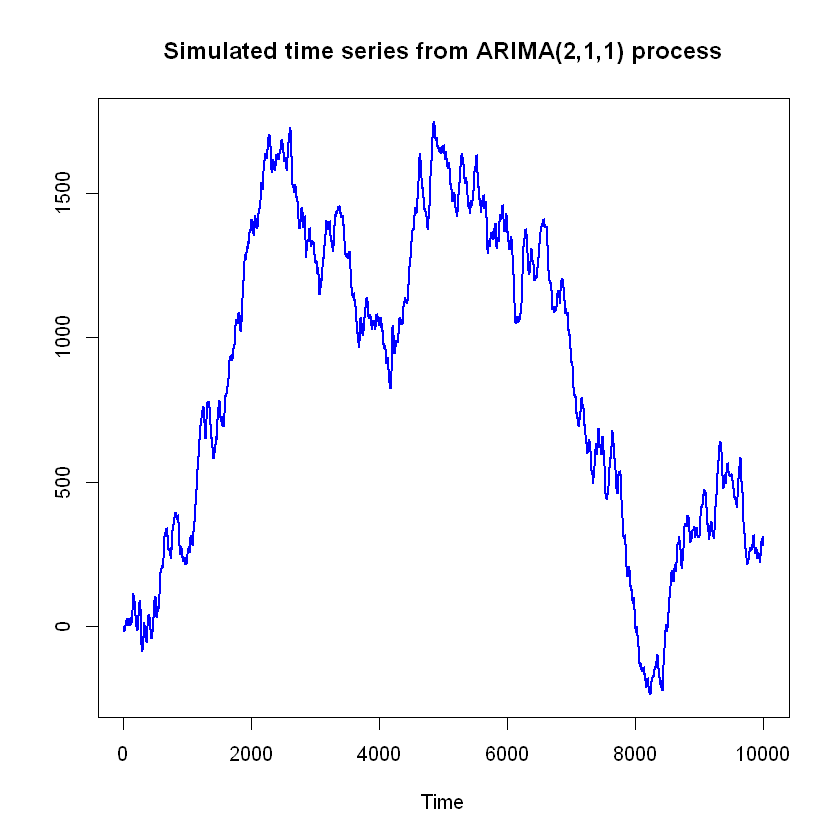

In [23]:
set.seed(5)
Simulated.Arima=arima.sim(n=m,list(order = c(2,1,1), ar = phi, ma=beta))
plot(Simulated.Arima, ylab=' ',main='Simulated time series from ARIMA(2,1,1) process', col='blue', lwd=2)

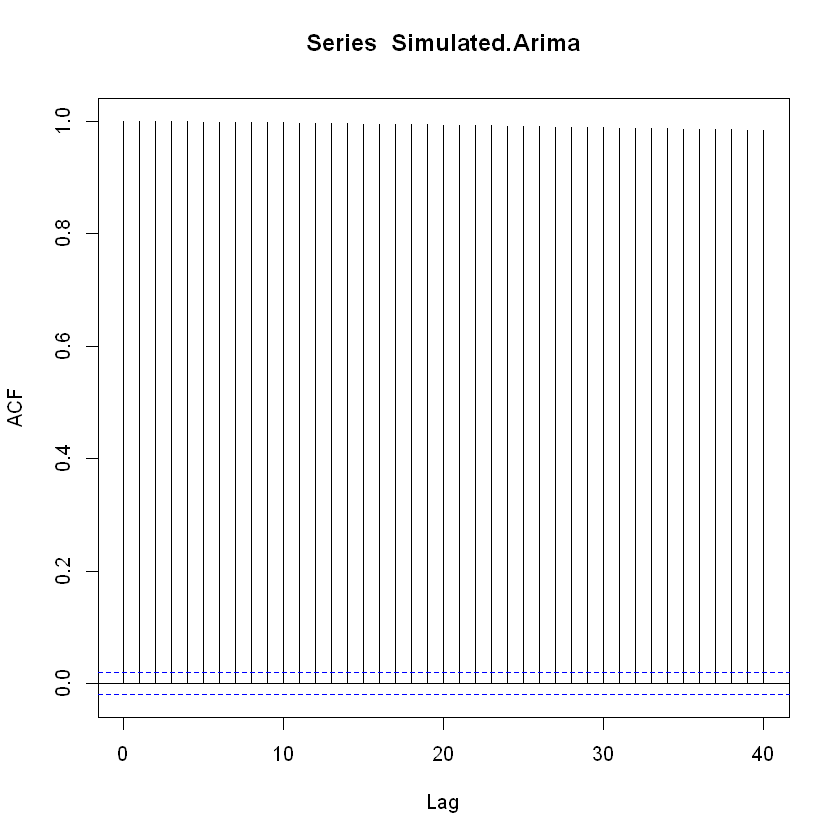

In [24]:
acf(Simulated.Arima)

Clearly the series is not stationary (due to unit root) but the difference is stationary:

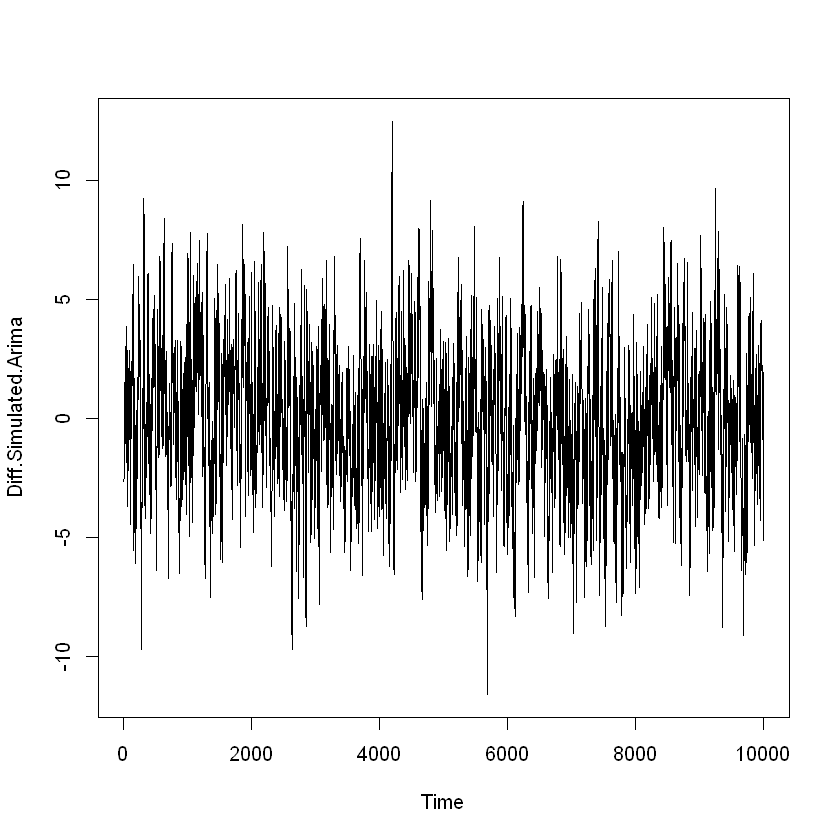

In [25]:
Diff.Simulated.Arima=diff(Simulated.Arima)
plot(Diff.Simulated.Arima)

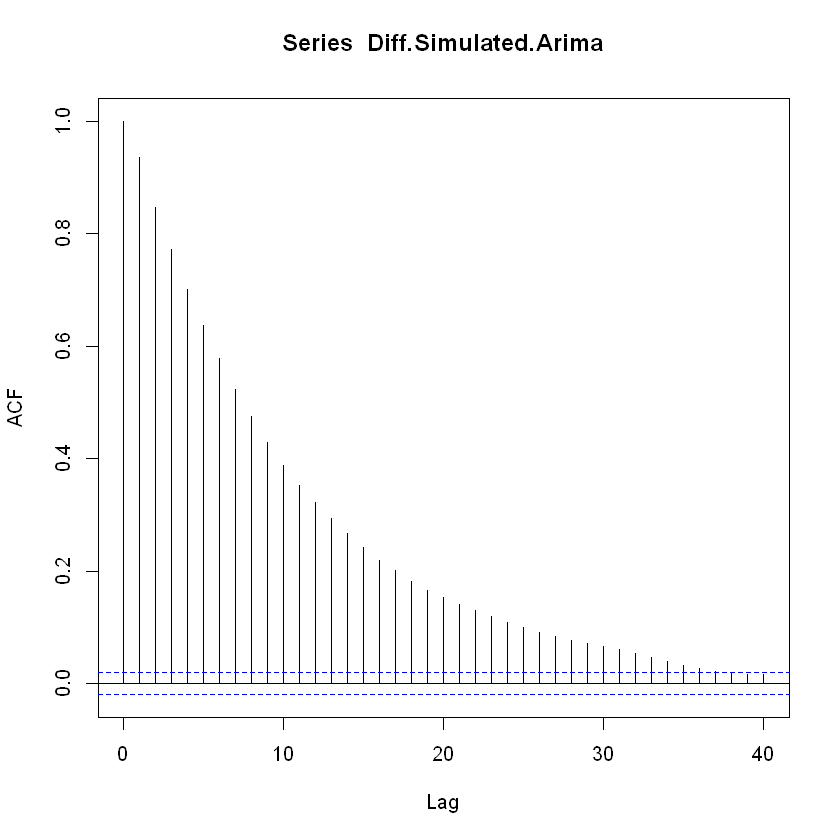

In [26]:
acf(Diff.Simulated.Arima)

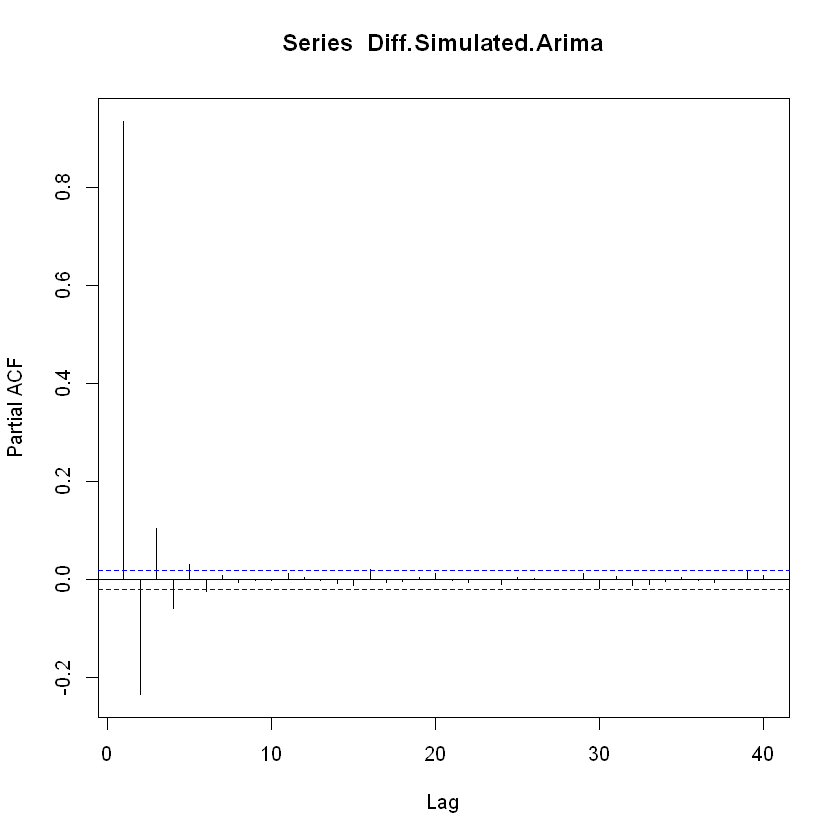

In [27]:
pacf(Diff.Simulated.Arima)

### Now we try to model the same process using sarima(). We first try (2,1,1) itself.

initial  value 1.092704 
iter   2 value 0.655083
iter   3 value 0.576329
iter   4 value 0.250793
iter   5 value 0.124855
iter   6 value 0.033738
iter   7 value 0.013225
iter   8 value 0.012554
iter   9 value 0.012517
iter  10 value 0.012292
iter  11 value 0.012267
iter  12 value 0.012258
iter  13 value 0.012170
iter  14 value 0.012069
iter  15 value 0.011860
iter  16 value 0.011703
iter  17 value 0.011609
iter  18 value 0.011601
iter  19 value 0.011601
iter  20 value 0.011601
iter  20 value 0.011601
iter  20 value 0.011601
final  value 0.011601 
converged
initial  value 0.011653 
iter   2 value 0.011653
iter   3 value 0.011653
iter   3 value 0.011653
iter   3 value 0.011653
final  value 0.011653 
converged


$fit

Call:
stats::arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, 
    Q), period = S), xreg = constant, transform.pars = trans, fixed = fixed, 
    optim.control = list(trace = trc, REPORT = 1, reltol = tol))

Coefficients:
         ar1    ar2     ma1  constant
      0.6876  0.204  0.5002    0.0280
s.e.  0.0334  0.032  0.0301    0.1398

sigma^2 estimated as 1.023:  log likelihood = -14305.92,  aic = 28621.83

$degrees_of_freedom
[1] 9996

$ttable
         Estimate     SE t.value p.value
ar1        0.6876 0.0334 20.5786  0.0000
ar2        0.2040 0.0320  6.3817  0.0000
ma1        0.5002 0.0301 16.6139  0.0000
constant   0.0280 0.1398  0.2001  0.8414

$AIC
[1] 2.862183

$AICc
[1] 2.862183

$BIC
[1] 2.865788


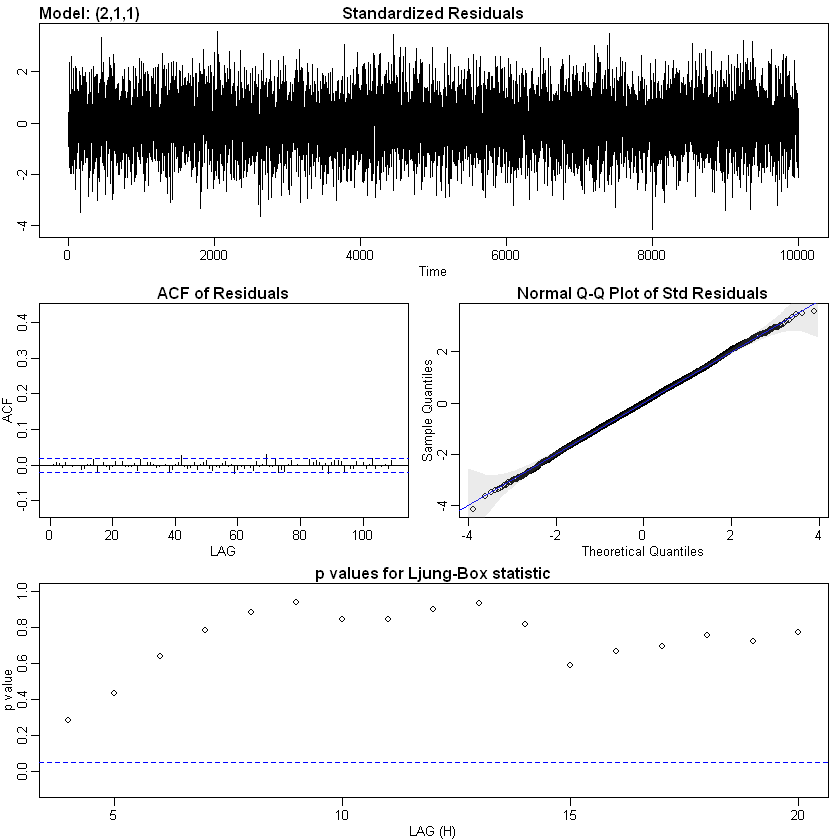

In [28]:
library(astsa)
sarima(Simulated.Arima,2,1,1,0,0,0) 

Clearly the coefficients are correct with AR(2) with phi=(0.6876, 0.204) and MA(1) with beta=(0.5002). Further note that (ACF plot, q-q plot and Ljung-Box) for residuals hints at them being normally distributed.

### Try fit with arima() with (4,0,0). Note the AIC is higher

In [29]:
fit1<-arima(diff(Simulated.Arima), order=c(4,0,0))
fit1


Call:
arima(x = diff(Simulated.Arima), order = c(4, 0, 0))

Coefficients:
         ar1      ar2     ar3      ar4  intercept
      1.1862  -0.3761  0.1733  -0.0581     0.0280
s.e.  0.0100   0.0154  0.0154   0.0100     0.1353

sigma^2 estimated as 1.025:  log likelihood = -14313.1,  aic = 28638.2

### Below (2,0,1) on diff(Series) is equivalent to (2,1,1) on Series. The AIC is same seen earlier from sarima().

In [30]:
fit2<-arima(diff(Simulated.Arima), order=c(2,0,1))
fit2


Call:
arima(x = diff(Simulated.Arima), order = c(2, 0, 1))

Coefficients:
         ar1    ar2     ma1  intercept
      0.6876  0.204  0.5002     0.0280
s.e.  0.0334  0.032  0.0301     0.1398

sigma^2 estimated as 1.023:  log likelihood = -14305.92,  aic = 28621.83